# Laboratorio 06: Álgebra Lineal.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Jesus Armando Cañas Gamboa
*Métodos computacionales 2025-I*

---

In [23]:
from numpy import linalg as ln
import numpy as np
import matplotlib.pyplot as plt

# 1.

<center>

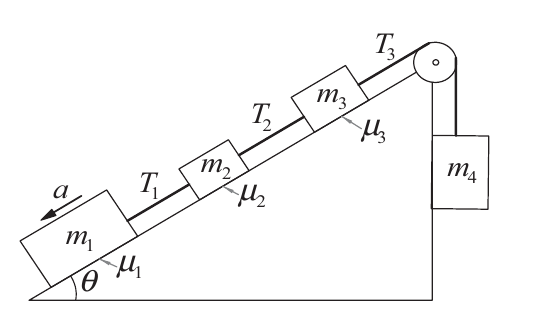

</center>

Cuatro bloques de masas diferentes $m_i$ están conectados por cuerdas de masa despreciable. Tres de los bloques se encuentran sobre un plano inclinado con un ángulo $\theta$, donde los coeficientes de fricción entre los bloques y el plano son $\mu_i$. Las ecuaciones de movimiento para el sistema son:

$$
T_1 + m_1a = m_1g(\sin \theta - \mu_1 \cos \theta) 
$$
$$
-T_1 + T_2 + m_2a = m_2g(\sin \theta - \mu_2 \cos \theta) 
$$
$$
-T_2 + T_3 + m_3a = m_3g(\sin \theta - \mu_3 \cos \theta) 
$$
$$
-T_3 + m_4a = -m_4g
$$

donde:
- $T_i$ representan las tensiones en las cuerdas
- $a$ es la aceleración del sistema
- $\theta = 45^\circ$ es el ángulo de inclinación
- $g = 9.81 m/s^2$ es la aceleración gravitatoria


Determine $a$ y $T_i$

**Datos:**

Masas de los bloques:
$$
\mathbf{m} = \begin{bmatrix}
10 & 4 & 5 & 6 \\
\end{bmatrix}^T kg
$$

Coeficientes de fricción:
$$
\mu = \begin{bmatrix}
0.25 & 0.3 & 0.2 \\
\end{bmatrix}^T
$$


In [1]:

#Definimos las variables que vamos a utilizar
theta = np.pi/4
g = 9.81
m1, m2, m3, m4 = 10, 4, 5, 6
mu1, mu2, mu3 = 0.25, 0.3, 0.2
#Definimos el las matrices asociadas al sistma
A = np.array([[1, 0,0,m1],
              [-1,1,0,m2],
              [0, -1, 1, m3],
              [0, 0, -1, m4]], dtype = float)
b = np.array([m1* g *( np.sin(theta) - mu1* np.cos(theta)),
              m2* g *( np.sin(theta) - mu2* np.cos(theta)),
              m3* g *( np.sin(theta) - mu3* np.cos(theta)),
              -m4 * g], dtype = float)
#resolvemos usando solve
x = ln.solve(A,b)
#imprimimos los resultados
for i in range(len(x)-1):
    print(f' La tension T{i+1} es {x[i]:.2f} N')
print(f' la aceleracion es {x[-1]:.2f} m/s^2')

 La tension T1 es 35.89 N
 La tension T2 es 48.86 N
 La tension T3 es 68.54 N
 la aceleracion es 1.61 m/s^2


# 2. 
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

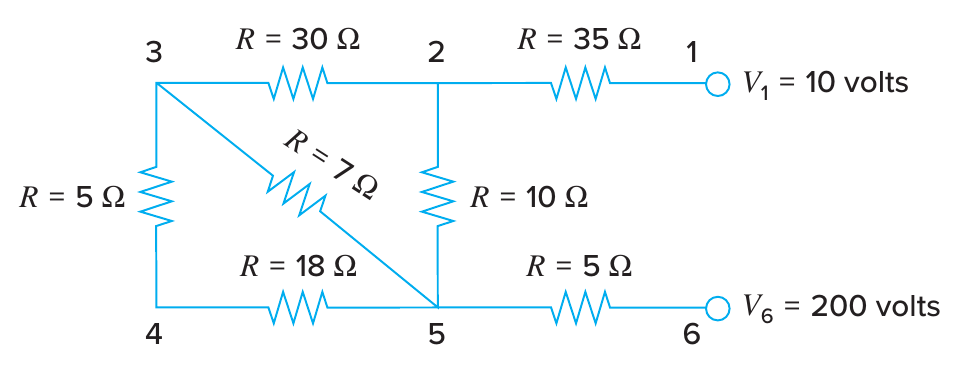


In [9]:
#Definimos el sistema asociado
A = np.array([[50, -10, 0],
             [-10, 47, -7],
             [0, -7, 30]], dtype = float)
b = np.array([190, 0, 0], dtype = float)

#Resolvemos las corrientes usando solve
I1, I2, I3 = ln.solve(A,b)

#Calculamos la corriente para cada resistencia
I12 = I1
I23 = I2
I35 = I2 -I3
I34 = I3
I45 = I3
I25 = I1- I2
I56 = I1

#Imprimimos
corrientes ={'I12': I12, 'I23':I23, 'I35': I35,'I34': I34, 'I45':I45, 'I25':I25,'I56': I56}
for I, corriente in corrientes.items():
    print(f'La corriente {I} es {corriente:.2f} A')

La corriente I12 es 3.98 A
La corriente I23 es 0.88 A
La corriente I35 es 0.67 A
La corriente I34 es 0.20 A
La corriente I45 es 0.20 A
La corriente I25 es 3.10 A
La corriente I56 es 3.98 A


# 3.
Se sabe que un sistema físico es gobernado por las ecuaciones,

$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

- Realice la diagonalización de $A$.

- Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

- Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

- Compare el resultado a la solución analítica,

$$
2x  = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), 
$$

$$
2y  = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})),
$$

$$
2z  = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
$$

In [31]:
A = np.array([[2, -1, 1],
             [0, 3, 1],
             [2, 1, 3]],dtype = float)
#Hayamos los valores y vectores propios de la matriz
values, vectores = ln.eig(A)
#Diagonalizamos
D = np.diag(values)

#Matriz con los valores propio
U = vectores.T
#Inversa de la matriz de valores propios
Uin = ln.inv(U)

#Definimos la funcion que nos calcula e^lambda*t
f_D = lambda t: np.diag([np.e**(D[i,i]*t)  for i in range(len(D))])

In [32]:
#Valores de tiempo
h = 0.01
t = np.arange(0, 2+h, h)
#Valor incial
r0 = [1,1,2]

#Calculamos la solucion 
def solucion(t, r0):
    ''' Esta funcion resuelve una ecuacion diferencial lineal de primer
    orden usando descomposicion por valores y vectores propios

    entradas
    t: array con los valores de tiempo
    r0 : vector con la condicion inicial
    
    salida :
    solucion: matriz
    '''
    n = len(t)
    Sol = np.zeros((3,n)) 

    for i in range(n):
        r = f_D(t[i])@ r0
        r = r.T
        Sol[:, i] = r
    return Sol
    

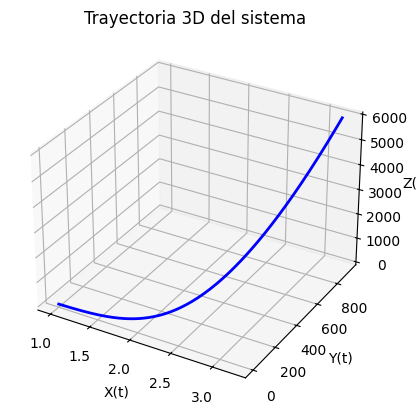

In [33]:
Sol = solucion(t, r0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la curva
ax.plot(Sol[0], Sol[1], Sol[2], color='blue', linewidth=2)

# Etiquetas
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('Z(t)')
ax.set_title('Trayectoria 3D del sistema')

plt.show()

In [34]:
def sistema_xyz(t, r0):

    x0, y0, z0 = r0
    x = 0.5 * (
        x0 * (np.exp(2*t)*(1 + np.exp(2*t) - 2*t)) +
        y0 * (-2*t*np.exp(2*t)) +
        z0 * (np.exp(2*t)*(-1 + np.exp(2*t)))
    )

    y = 0.5 * (
        x0 * (-np.exp(2*t)*(-1 + np.exp(2*t) - 2*t)) +
        y0 * (2*(t + 1)*np.exp(2*t)) +
        z0 * (-np.exp(2*t)*(-1 + np.exp(2*t)))
    )

    z = 0.5 * (
        x0 * (np.exp(2*t)*(-1 + np.exp(2*t) + 2*t)) +
        y0 * (2*t*np.exp(2*t)) +
        z0 * (np.exp(2*t)*(1 + np.exp(2*t)))
    )

    return x, y, z


# Intervalo de tiempo
t = np.linspace(0, 2, 200)

# Evaluar
X, Y, Z = sistema_xyz(t, r0)


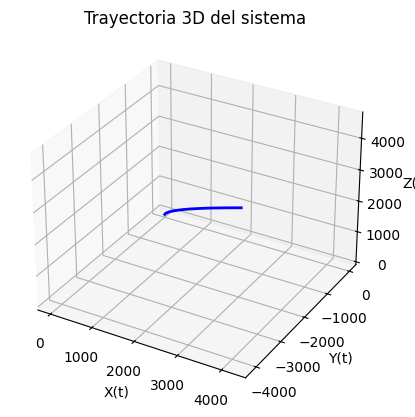

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la curva
ax.plot(X, Y, Z, color='blue', linewidth=2)

# Etiquetas
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('Z(t)')
ax.set_title('Trayectoria 3D del sistema')

plt.show()

# 4.
Un electrón interactúa con un campo magnético uniforme. Para determinar los niveles de energía permitidos del electrón en presencia del campo magnético, es necesario resolver la ecuación:

$$
\hat{H}|\Psi\rangle = E|\Psi\rangle
$$

donde el Hamiltoniano está dado por $H = -\bm{\mu} \cdot \bm{B} = -\gamma \bm{B} \cdot \bm{S}$, siendo $\gamma$ la razón giromagnética, $\bm{B}$ el campo magnético y $\bm{S}$ el espín. Puede demostrarse que el Hamiltoniano se expresa como:

$$
\hat{H} = -\frac{\gamma\hbar}{2}\begin{pmatrix} 
B_z & B_x - iB_y \\ 
B_x + iB_y & -B_z 
\end{pmatrix} 
$$

El valor experimental de $\gamma$ para el electrón es 2. El orden de magnitud del campo magnético es 1 gauss en dirección z.

- Verifique que $H$ es hermítica.
- Encuentre los niveles de energía permitidos.
- Determine los autovectores y verifique su normalización.



# 5.

Considere el sistema de tres masas y cuatro resortes mostrado en la figura. 

<center>

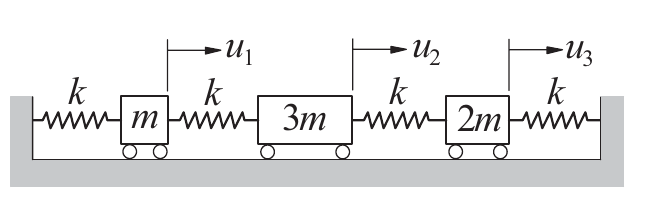
</center>

Las ecuaciones diferenciales que describen el movimiento del sistema masa-resorte son:

$$
k \left( -2u_1 + u_2 \right) = m\ddot{u}_1 
$$

$$
k(u_1 - 2u_2 + u_3) = 3m\ddot{u}_2 
$$

$$
k(u_2 - 2u_3) = 2m\ddot{u}_3
$$

donde:
- $u_i(t)$ representa el desplazamiento de la masa $i$ desde su posición de equilibrio.
- $k$ es la constante de los resortes.
- $m$ es la masa.

Determinar las frecuencias de vibración ($\omega$) en términos de $\sqrt{k/m}$ y las formas modales correspondientes.

In [5]:
import sympy as sp

# Definir símbolos
k, m, omega = sp.symbols('k m omega')

# Matrices de rigidez (K) y masa (M)
K = sp.Matrix([
    [2*k, -k,   0],
    [-k, 2*k, -k],
    [0,   0,  2*k]
])

M = sp.Matrix([
    [m,   0,   0],
    [0, 3*m,   0],
    [0,   0, 2*m]
])

# Plantear el problema: K v = ω² M v  →  (K - ω² M)v = 0
# Usamos lambda = ω²
lam = sp.symbols('lambda')
A = K - lam * M

# Determinante para obtener los valores propios simbólicos
det = A.det()

# Resolver el polinomio característico: det(K - λ M) = 0
valores_propios = sp.solve(det, lam)

# Calcular frecuencias ω = sqrt(λ)
frecuencias = [sp.sqrt(sp.simplify(l)) for l in valores_propios]

# Mostrar resultados
for i, omega in enumerate(frecuencias, start=1):
     display(sp.Eq(sp.Symbol(f'\\omega_{i}'), omega))

Eq(\omega_1, sqrt(k/m))

Eq(\omega_2, sqrt(3)*sqrt(k/m)*sqrt(4 - sqrt(7))/3)

Eq(\omega_3, sqrt(3)*sqrt(k/m)*sqrt(sqrt(7) + 4)/3)